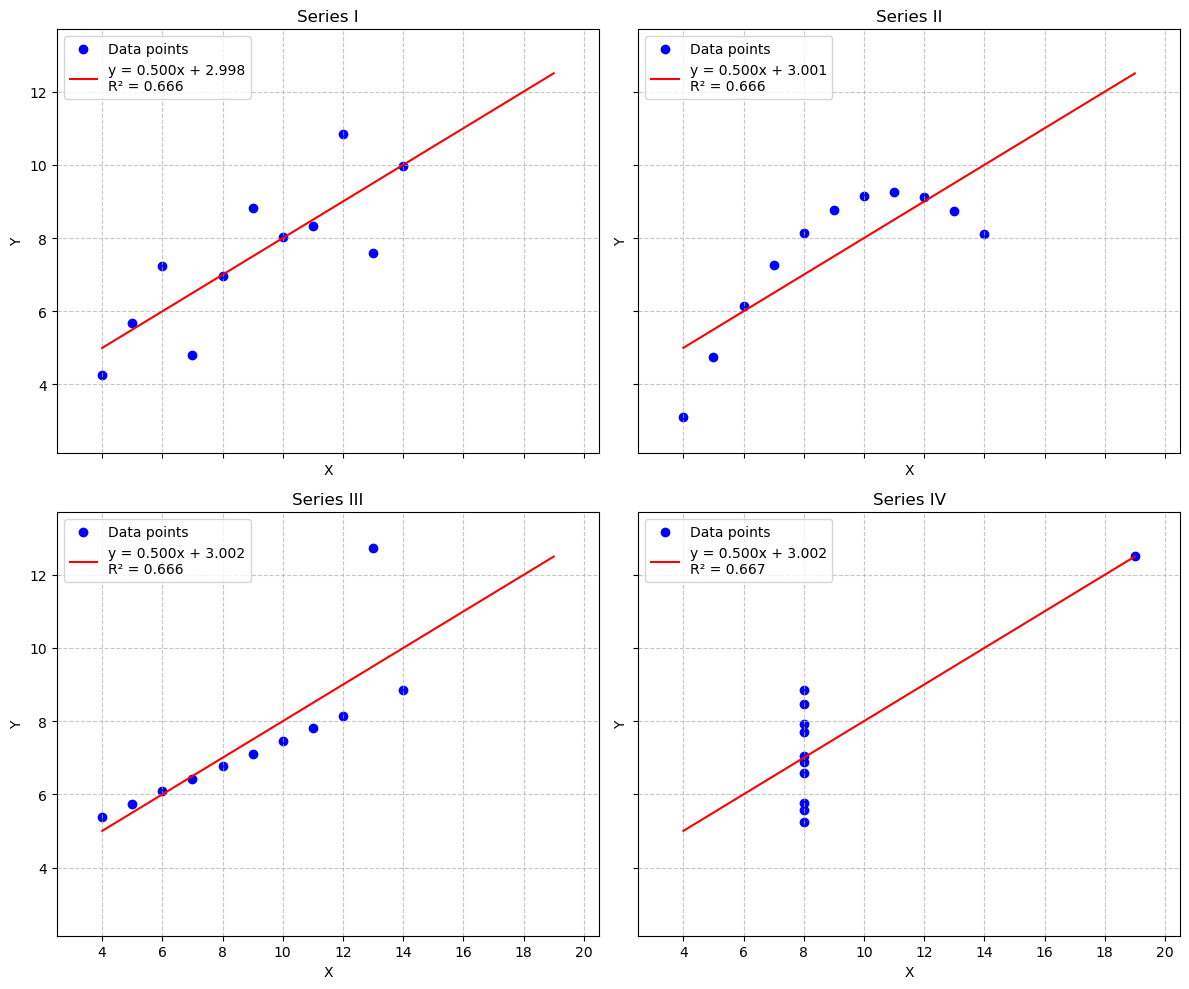

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import json

# Load the JSON data
with open('anscombe.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Get unique series
series_names = df['Series'].unique()

# Find global min and max for x and y to set consistent axes
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()

# Add some padding
x_padding = (x_max - x_min) * 0.1
y_padding = (y_max - y_min) * 0.1

# Process each series
for i, series in enumerate(sorted(series_names)):
    # Filter data for this series
    series_data = df[df['Series'] == series]
    x = series_data['X']
    y = series_data['Y']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_x = np.array([x_min, x_max])
    line_y = slope * line_x + intercept
    
    # Plot data points
    axes[i].scatter(x, y, color='blue', label='Data points')
    
    # Plot regression line
    axes[i].plot(line_x, line_y, color='red', 
                 label=f'y = {slope:.3f}x + {intercept:.3f}\nR² = {r_value**2:.3f}')
    
    # Set plot title
    axes[i].set_title(f'Series {series}')
    
    # Set axes limits
    axes[i].set_xlim(x_min - x_padding, x_max + x_padding)
    axes[i].set_ylim(y_min - y_padding, y_max + y_padding)
    
    # Add legend
    axes[i].legend()
    
    # Add grid
    axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Add x and y labels
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')

# Adjust layout
plt.tight_layout()
plt.show()